# KHF 1

## 1st Task

- First we have to install the Python Image Library to open various image files ([Pillow]( https://pillow.readthedocs.io/en/stable/) is a fork of PIL)

In [18]:
! pip install pillow

In [19]:
! curl -L -o 1.png "https://drive.google.com/uc?export=download&id=1fhrtnxty4jtbmrI6C_7w_0WViu61iKKL"
! curl -L -o 2.png "https://drive.google.com/uc?export=download&id=1yG7F8QgEoZ5HL8CarI3mXXsFRcYFRiWi"
! curl -L -o 3.png "https://drive.google.com/uc?export=download&id=1l-Iujd2TiwQBGUjRcIkDvPQif-oowVXe"
! curl -L -o 4.png "https://drive.google.com/uc?export=download&id=1OsJdKVL7-_MTv9418AaC3LTPqjlBklsW"
! curl -L -o 5.png "https://drive.google.com/uc?export=download&id=1eY5V7iL-UMDHmS0HugNQYju6VOUDwzzX"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 24349  100 24349    0     0  33893      0 --:--:-- --:--:-- --:--:-- 33893
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  105k  100  105k    0     0   111k      0 --:--:-- --:--:-- --:--:--  111k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload 

![](1.png)
![](2.png)
![](3.png)
![](4.png)
![](5.png)

In [20]:
from PIL import Image
import numpy as np
import requests as rq

images = [Image.open(f"{image}.png") for image in range(1, 6)]

rgb_values = [np.array(image.getdata()).reshape(256, 256, 3) for image in images]

![image 1](images/1.jpeg) ![image 2](images/2.jpeg) ![image 3](images/3.jpeg) ![image 4](images/4.jpeg) ![image 5](images/5.jpeg)

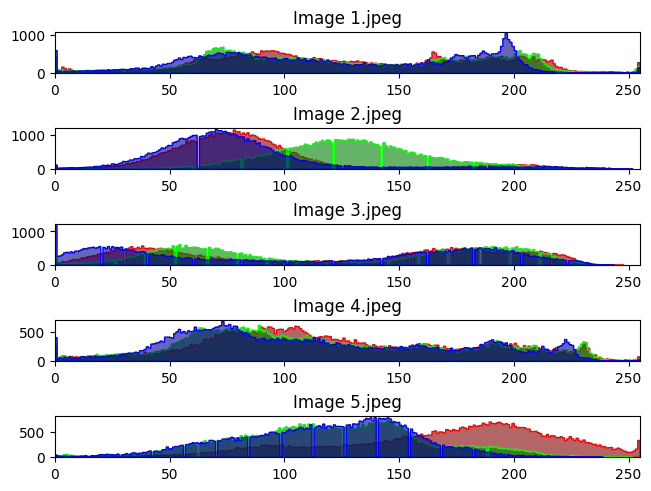

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = len(rgb_values))

for i, image in enumerate(rgb_values):
    axs[i].hist(image[:, :, 0].flatten(), histtype='stepfilled', bins=256, fc=(0.5, 0, 0, 0.6), ec=(1, 0, 0))
    axs[i].hist(image[:, :, 1].flatten(), histtype='stepfilled', bins=256, fc=(0, 0.5, 0, 0.6), ec=(0, 1, 0))
    axs[i].hist(image[:, :, 2].flatten(), histtype='stepfilled', bins=256, fc=(0, 0, 0.5, 0.6), ec=(0, 0, 1))
    axs[i].set(xlim=(0, 255))
    axs[i].set_title(f"Image {i+1}.jpeg")

fig.set_layout_engine("constrained")
plt.show()

In [32]:
def standardize(array: np.ndarray) -> np.ndarray:
    mean = array.mean()
    std = array.std()
    return (array - mean) / std

for i, image in enumerate(rgb_values):
    print(f"Image {i+1}")
    (red, green, blue) = (image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten())
    print(f"mean: red = {red.mean()}, green = {green.mean()}, blue = {blue.mean()}")
    print(f"standard deviation: red = {red.std()}, green = {green.std()}, blue = {blue.std()}")
    print("Standardizing array...")
    (red, green, blue) = (standardize(red), standardize(green), standardize(blue))
    print(f"mean: red = {red.mean()}, green = {green.mean()}, blue = {blue.mean()}")
    print(f"standard deviation: red = {red.std()}, green = {green.std()}, blue = {blue.std()}")

Image 1
mean: red = 129.31117248535156, green = 126.22615051269531, blue = 122.25886535644531
standard deviation: red = 56.26702097884492, green = 57.656781049496274, blue = 56.832835147990615
Standardizing array...
mean: red = 0.0, green = -5.551115123125783e-17, blue = 0.0
standard deviation: red = 1.0, green = 1.0, blue = 1.0
Image 2
mean: red = 87.02581787109375, green = 127.73237609863281, blue = 81.12176513671875
standard deviation: red = 41.581930578377815, green = 34.02091855817746, blue = 41.23209918655131
Standardizing array...
mean: red = 8.673617379884035e-19, green = -1.2576745200831851e-17, blue = -2.6020852139652106e-18
standard deviation: red = 1.0, green = 1.0, blue = 0.9999999999999998
Image 3
mean: red = 119.86570739746094, green = 123.92958068847656, blue = 110.76808166503906
standard deviation: red = 70.9413724906232, green = 65.36862846118872, blue = 74.125773595801
Standardizing array...
mean: red = -2.7755575615628914e-17, green = 2.0816681711721685e-17, blue = 

## Task 3

In [23]:
! pip install spicy

In [24]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

audio_links = ["https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav", "https://www2.cs.uic.edu/~i101/SoundFiles/StarWars3.wav"]

for i in audio_links:
    data = rq.get(i).content
    print(f"{i.split('/')[-1]}")
    with open(f"{i.split('/')[-1]}", "wb") as file:
        file.write(data)

audio_files = [f"{link.split('/')[-1]}" for link in audio_links]

CantinaBand3.wav
StarWars3.wav


C:\Users\zsomb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\axes\_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


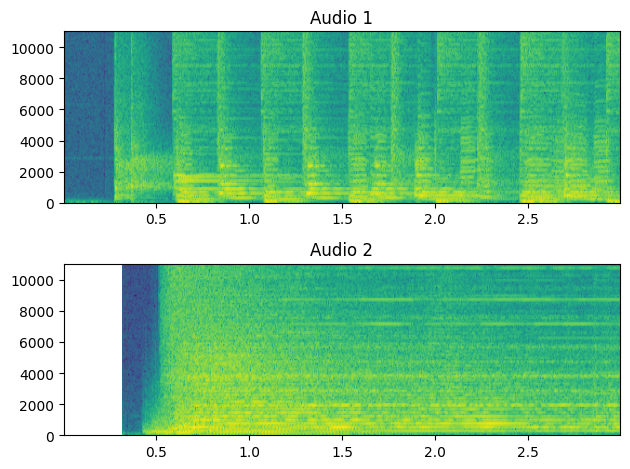

In [25]:
fig, axs = plt.subplots(nrows=2)
for i, audio_file in enumerate(audio_files):
    Fs, aud = wavfile.read(audio_file)
    axs[i].specgram(aud, Fs=Fs)
    axs[i].set_title(f"Audio {i+1}")

fig.tight_layout()
plt.show()

In [26]:
for i, audio_file in enumerate(audio_files):
    print(f"Audio {i+1}")
    Fs, aud = wavfile.read(audio_file)
    aud = np.array(aud)
    print(f"mean: {aud.mean()}")
    print(f"standard deviation: {aud.std()}")
    print("Standardizing array...")

    aud = standardize(aud)
    print(f"mean: {aud.mean()}")
    print(f"standard deviation: {aud.std()}")

Audio 1
mean: -2.556130007558579
standard deviation: 1375.4416663795082
Standardizing array...
mean: 6.444832070386396e-19
standard deviation: 1.0000000000000002
Audio 2
mean: 4.491156462585034
standard deviation: 3801.1987188201024
Standardizing array...
mean: -1.6555162380805056e-17
standard deviation: 0.9999999999999999


## Task 5

In [27]:
! pip install requests

In [28]:
import requests as rq

text = rq.get("http://smartlab.tmit.bme.hu/oktatas-deep-learning").text

In [29]:
print(text)


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
    <title>Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT</title>

    <!-- Meta -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="Deep Learning a gyakorlatban Python és LUA alapon tantárggyal kapcsolatos honlap">
    <meta name="author" content="SmartLab, BME-TMIT">

    <!-- Favicon -->
    <link rel="shortcut icon" href="favicon.ico">

    <!-- Web Fonts -->
    <link rel='stylesheet' type='text/css' href='//fonts.googleapis.com/css?family=Open+Sans:400,300,600&amp;subset=cyrillic,latin'>

    <!-- CSS Global Compulsory -->
    <link rel="stylesheet" href="/assets/plugins/bootstrap/css/bootstrap.min.css">
    <link rel="stylesheet" href="/assets/css/style.css">

    <!

In [30]:
from collections import Counter

c = Counter(text.lower())
c = {k: v for k, v in c.items() if k.isalpha()}

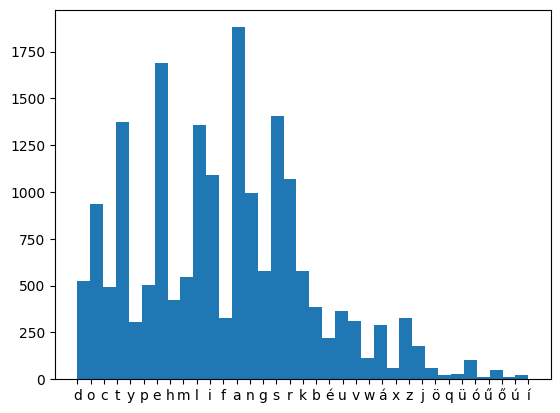

In [31]:
plt.hist(c.keys(), len(c), weights=c.values())
plt.show()